In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

from sklearn.feature_selection import f_regression


In [2]:
df_tool=pd.read_csv(r"D:\Cursos\REPOSITORIOS\TOOLBOX_1\data_science_salaries.csv")

In [3]:
df_prueba=pd.read_excel(r"D:\Cursos\REPOSITORIOS\TOOLBOX_1\titanic_encoder.xlsx")

In [4]:
df_prueba

,survived,pclass,alone_num,sex_female,sex_male,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,sibsp_log,parch_log,fare_log,age_log
0,0,3,0,0,1,0,1,0,0,0,1,1.459541,-0.560493,0.060517,-1.336138e-01
1,1,1,0,1,0,0,0,1,1,0,0,1.459541,-0.560493,0.226860,5.634331e-01
2,1,3,1,1,0,0,0,1,0,0,1,-0.682233,-0.560493,0.066995,7.944239e-02
3,1,1,0,1,0,0,0,1,0,0,1,1.459541,-0.560493,0.205429,4.585489e-01
4,0,3,1,0,1,0,1,0,0,0,1,-0.682233,-0.560493,0.068134,4.585489e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,1,0,1,0,0,0,1,-0.682233,-0.560493,0.103015,1.275754e-01
887,1,1,1,1,0,0,0,1,0,0,1,-0.682233,-0.560493,0.163874,-3.205879e-01
888,0,3,0,1,0,0,0,1,0,0,1,1.459541,1.791653,0.145947,3.980632e-17
889,1,1,1,0,1,0,1,0,1,0,0,-0.682233,-0.560493,0.163874,7.944239e-02


In [5]:
df_tool

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium
...,...,...,...,...,...,...,...,...,...,...,...
11082,Staff Data Analyst,Entry-level,Contract,Hybrid,2020,Canada,60000,CAD,44753,Canada,Large
11083,Staff Data Analyst,Executive-level,Full-time,On-site,2020,Nigeria,15000,USD,15000,Canada,Medium
11084,Machine Learning Manager,Senior-level,Full-time,Hybrid,2020,Canada,157000,CAD,117104,Canada,Large
11085,Data Engineer,Mid-level,Full-time,Hybrid,2020,Austria,65000,EUR,74130,Austria,Large


In [6]:
df_tool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           11087 non-null  object
 1   experience_level    11087 non-null  object
 2   employment_type     11087 non-null  object
 3   work_models         11087 non-null  object
 4   work_year           11087 non-null  int64 
 5   employee_residence  11087 non-null  object
 6   salary              11087 non-null  int64 
 7   salary_currency     11087 non-null  object
 8   salary_in_usd       11087 non-null  int64 
 9   company_location    11087 non-null  object
 10  company_size        11087 non-null  object
dtypes: int64(3), object(8)
memory usage: 952.9+ KB


In [7]:
df_tool.shape

(11087, 11)

In [8]:
df_tool.work_year.unique()

array([2024, 2023, 2022, 2021, 2020], dtype=int64)

### Funcion: describe_df

In [9]:
def funcion_describe(df):

    resultado = pd.DataFrame()
    """
    Obtiene información sobre porcentaje de cardinalidad, el tipo de datos, los valores únicos y el porcentaje de valores NaN en cada columna de un DataFrame.

    Args:
        df: El DataFrame del que se quiere obtener la información.

    Returns:
        Un diccionario con la información de cada columna.
    """
    for col in df.columns:
        datos = {}
        datos['%_cardinalidad'] = round(df[col].nunique() / len(df) * 100, 2)
        datos['Tipo_dato'] = df[col].dtype
        datos['valores_unicos'] = df[col].nunique()
        datos['%_NaN'] = round(df[col].isna().mean() * 100, 2)
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [10]:
funcion_describe(df_prueba)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
survived,0.22,int64,2,0.0
pclass,0.34,int64,3,0.0
alone_num,0.22,int64,2,0.0
sex_female,0.22,int64,2,0.0
sex_male,0.22,int64,2,0.0
who_child,0.22,int64,2,0.0
who_man,0.22,int64,2,0.0
who_woman,0.22,int64,2,0.0
embark_town_Cherbourg,0.22,int64,2,0.0
embark_town_Queenstown,0.22,int64,2,0.0


In [11]:
funcion_describe(df_tool)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
job_title,1.19,object,132,0.0
experience_level,0.04,object,4,0.0
employment_type,0.04,object,4,0.0
work_models,0.03,object,3,0.0
work_year,0.05,int64,5,0.0
employee_residence,0.78,object,87,0.0
salary,16.53,int64,1833,0.0
salary_currency,0.2,object,22,0.0
salary_in_usd,19.37,int64,2147,0.0
company_location,0.68,object,75,0.0


### Funcion: tipifica_variables

In [12]:

def funcion_categorias(df):
    
    """
    Obtiene información sobre el tipo de categoria de cada columna de un DataFrame.

    Args:
        df: El DataFrame del que se quiere obtener la información.

    Returns:
        Un diccionario con la información de cada columna.
    """

    resultado = pd.DataFrame()
    for col in df.columns:
        datos = {}
        if pd.api.types.is_numeric_dtype(df[col]):
            datos['Categoria'] = 'numerica continua' if df[col].nunique() > 10 else 'numerica discreta'
        else:
            datos['Categoria'] = 'categorica ordinal' if df[col].nunique() > 2 else 'categorica nominal'
   
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [13]:
funcion_categorias(df_prueba)

,Categoria
survived,numerica discreta
pclass,numerica discreta
alone_num,numerica discreta
sex_female,numerica discreta
sex_male,numerica discreta
who_child,numerica discreta
who_man,numerica discreta
who_woman,numerica discreta
embark_town_Cherbourg,numerica discreta
embark_town_Queenstown,numerica discreta


In [14]:
funcion_categorias(df_tool)

,Categoria
job_title,categorica ordinal
experience_level,categorica ordinal
employment_type,categorica ordinal
work_models,categorica ordinal
work_year,numerica discreta
employee_residence,categorica ordinal
salary,numerica continua
salary_currency,categorica ordinal
salary_in_usd,numerica continua
company_location,categorica ordinal


  ### funcion get_features_num_regression

In [32]:
def get_features_num_regression(df, target_col,umbral, pvalue=None):
    """
    Devuelve una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr".

    Args:
        df: El DataFrame del que se quiere obtener las características correlacionadas.
        target_col: El nombre de la columna objetivo.
        umbral= cantidad numerico entre 0 a 1
    
    Returns:
        Una lista con las columnas correlacionadas.
    """
# Calculamos las correlaciones y p-values utilizando f_regression, sin la tarhet y supespues la incluimos otra vez.
    _, p_values = f_regression(df.drop(columns=[target_col]), df[target_col])

    # Filtramos las columnas según el umbral y p-value.
    columnas_correlacionadas = df.columns[abs(df.corr()[target_col]) >= umbral].tolist()

    # Filtramos por significancia si se proporciona un p-value.
    if pvalue is not None:
        columnas_correlacionadas = [col for col, p_val in zip(columnas_correlacionadas, p_values) if p_val <= pvalue]

    return columnas_correlacionadas



In [33]:
get_features_num_regression(df_prueba, "survived",0.5, pvalue=None)

['survived', 'sex_female', 'sex_male', 'who_man', 'who_woman']

### Funcion: plot_features_num_regression

In [49]:
def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Crea un conjunto de pair plots para visualizar las correlaciones entre las columnas numéricas del DataFrame.

    Args:
        df: El DataFrame del que se quiere visualizar las correlaciones.
        target_col: El nombre de la columna objetivo.
        umbral_corr= numbral maximo establecido de correlacion con la target
        pvalue: El valor de p-valor.

    Returns:
        None
    """

    columnas_para_pintar = []
    columnas_umbral_mayor = []

    #iteramos por la columnas
    for col in columns:
        #si en la iteracion de las columnas del DF y siempre que usando la funcion de pandas pd.api.types.is_numeric_dtype 
        #comprube si son numericas(true) o no son nuemricas(false)
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # usando el indice de correlación de Pearson y el p-valor(funcion pearsonr)
            # calculamos dichos parametros para target y resto de columnas
            corr, p = pearsonr(df[col], df[target_col])
            if abs(corr) > umbral_corr:
                columnas_umbral_mayor.append(col)
                if pvalue is None or p < pvalue:
                    columnas_para_pintar.append(col)

    # Número máximo de gráficas por grupo
    max_graficas_por_grupo = 6

    # Dividir en grupos según el número máximo de gráficas
    len(columnas_para_pintar) // max_graficas_por_grupo
    # En un alista de comprension, iteramos en rango desde 0 hasta el numero de columnas a pintar, por cada grupo maximo establecido
    # creando graficas con columnas maxi de i+ grupo max establecido ( ejem: '0 hasta 0+6)
    columnas = [columnas_para_pintar[i:i+max_graficas_por_grupo] for i in range(0, len(columnas_para_pintar), max_graficas_por_grupo)]

    # iteramos por i y por valor establecido a cada grupo en cada iteración,  creeando pair plots para cada grupo,
    for i, grupo in enumerate(columnas):
        sns.pairplot(df, vars=grupo, hue=target_col)
        plt.suptitle(f"Group {i}", y=1.02)# creo nombres de grupo un poco por encima de y, para que no se superponga con la gráfica
        plt.show()
    
    return "Las columnas con un mayor umbral al umbral establecido son", columnas_umbral_mayor



In [38]:
df_prueba.columns

Index(['survived', 'pclass', 'alone_num', 'sex_female', 'sex_male',
       'who_child', 'who_man', 'who_woman', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'sibsp_log',
       'parch_log', 'fare_log', 'age_log'],
      dtype='object')

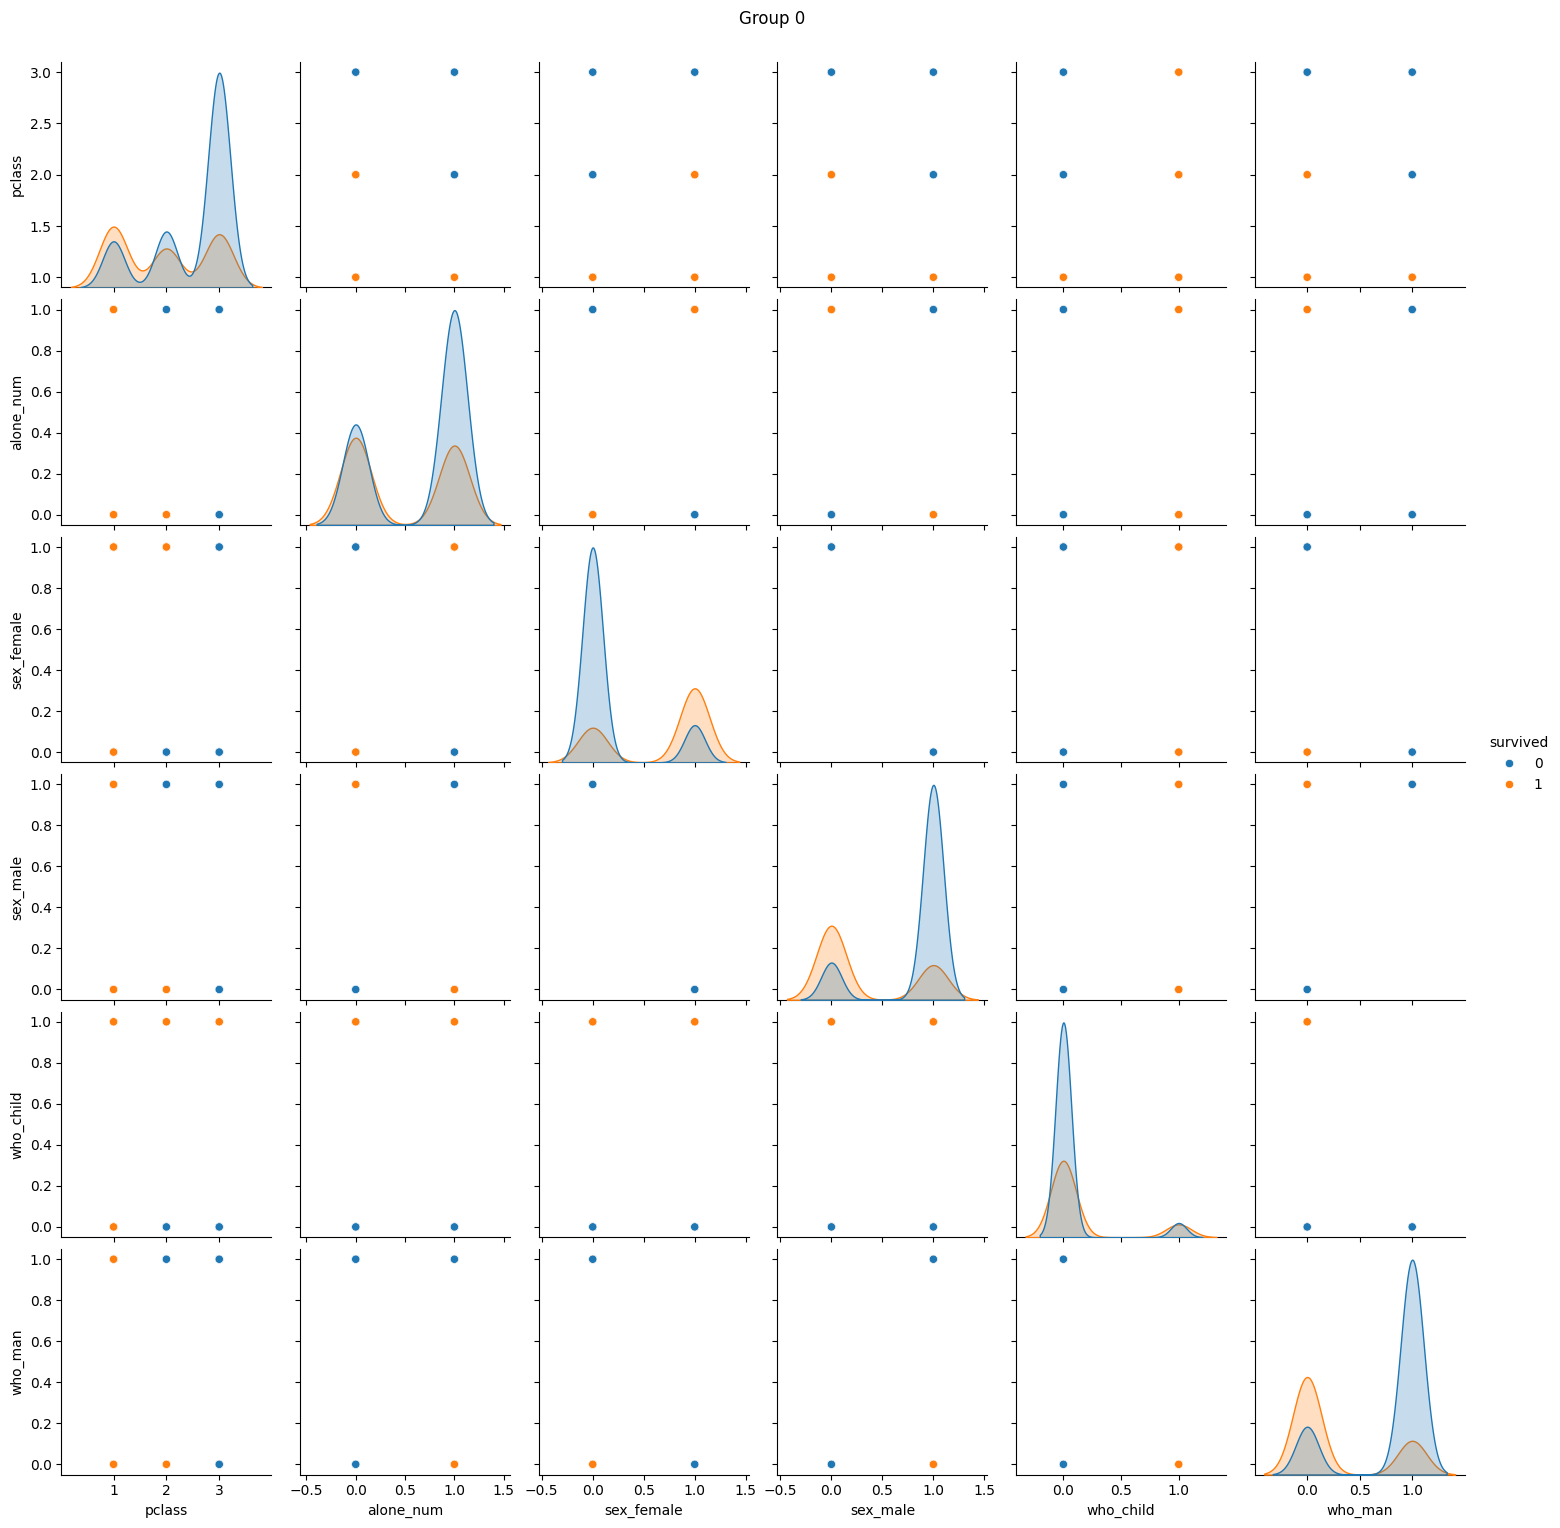

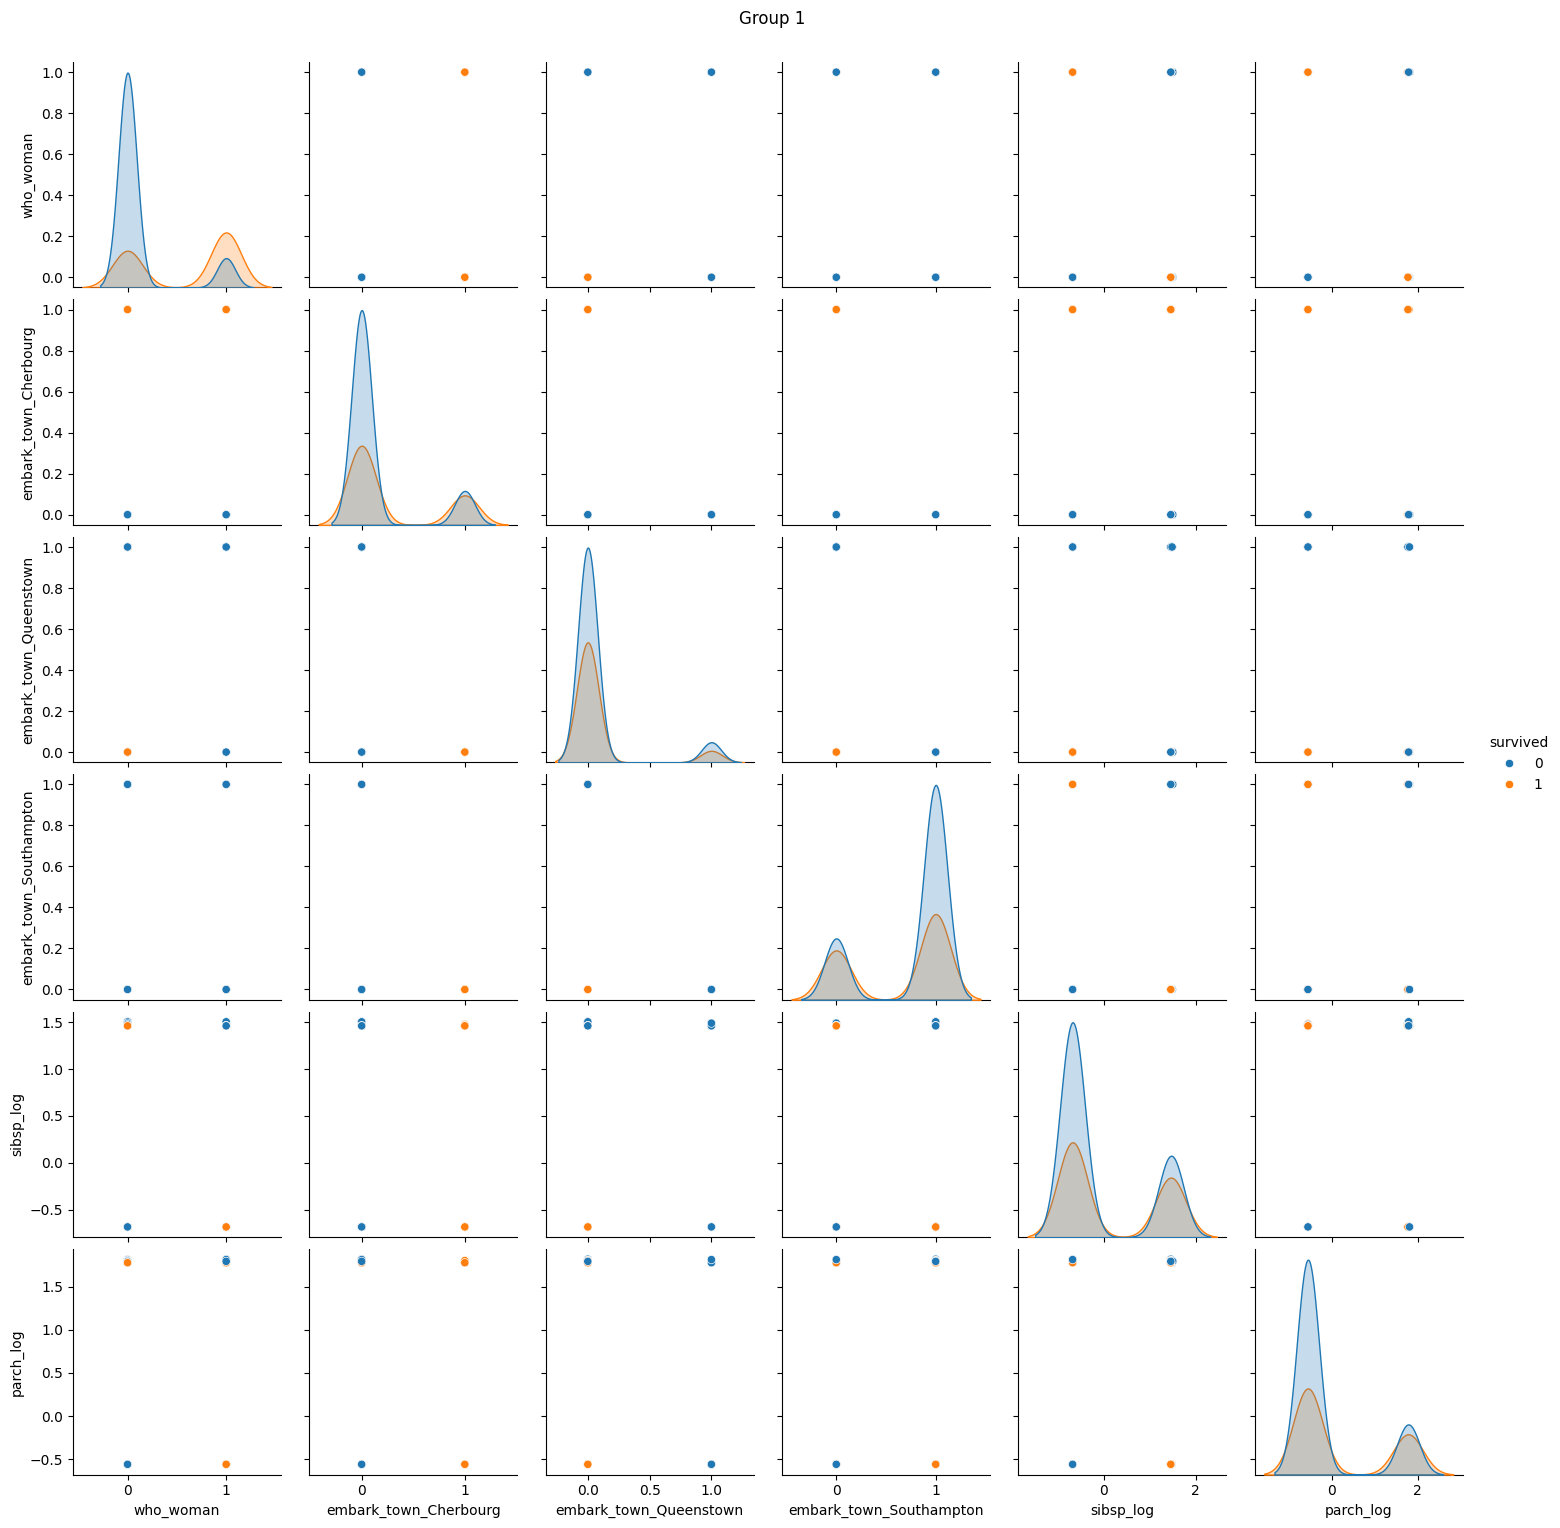

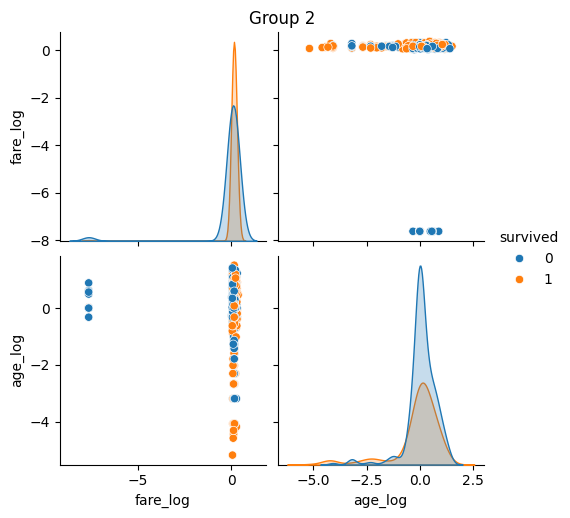

('Las columnas con mayor umbral son \n',
 ['pclass',
  'alone_num',
  'sex_female',
  'sex_male',
  'who_child',
  'who_man',
  'who_woman',
  'embark_town_Cherbourg',
  'embark_town_Queenstown',
  'embark_town_Southampton',
  'sibsp_log',
  'parch_log',
  'fare_log',
  'age_log'])

In [50]:

plot_features_num_regression(df_prueba, "survived", columns=['pclass', 'alone_num', 'sex_female', 'sex_male','who_child', 'who_man', 'who_woman', 'embark_town_Cherbourg','embark_town_Queenstown', 'embark_town_Southampton', 'sibsp_log',
       'parch_log', 'fare_log', 'age_log'], umbral_corr=0, pvalue=None)


In [ ]:
df_tool.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Uso de la función
plot_features_num_regression(df_tool,'salary',['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'], 0, pvalue=0)

['work_year', 'salary', 'salary_in_usd']